In [1]:
from data_flywheel import DataFlywheel

/root/miniforge-pypy3/envs/icevision/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:17


In [2]:
# Create a configuration dictionary
config = {
    'annotation_path': '/root/data-flywheel/notebooks/objectlab/pascal_voc_annotations/',
    'image_path': '/workspace/yolo_v8_training/oiv7_full/validation/',
    'wandb_project': 'data-flywheel-test'
}

# Instantiate the DataFlywheel
flywheel = DataFlywheel(config)


04/04/2024 08:24:40 - ERROR - wandb.jupyter -   Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: dnth. Use `wandb login --relogin` to force relogin


wandb: Adding directory to artifact (/root/data-flywheel/notebooks/objectlab/pascal_voc_annotations)... Done. 0.7s


In [3]:
flywheel.load_annotations()

INFO     - Loading image annotations... | data_flywheel.flywheel:load_annotations:28
INFO     -   Annotations folder: /root/data-flywheel/notebooks/objectlab/pascal_voc_annotations/ | data_flywheel.flywheel:load_annotations:30
INFO     -   Image folder: /workspace/yolo_v8_training/oiv7_full/validation/ | data_flywheel.flywheel:load_annotations:31


  0%|          | 0/855 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/855 [00:00<?, ?it/s]

WARNING  - (record_id: 0065e1098f7a353b) - 🚫 Record could not be autofixed and will be removed because: File '/workspace/yolo_v8_training/oiv7_full/validation/0065e1098f7a353b.xml' does not exist | icevision.core.record:autofix_records:100
WARNING  - (record_id: 00770ee8f5ad87ef) - 🚫 Record could not be autofixed and will be removed because: File '/workspace/yolo_v8_training/oiv7_full/validation/00770ee8f5ad87ef.xml' does not exist | icevision.core.record:autofix_records:100
WARNING  - (record_id: 0160b5826ab10020) - 🚫 Record could not be autofixed and will be removed because: File '/workspace/yolo_v8_training/oiv7_full/validation/0160b5826ab10020.xml' does not exist | icevision.core.record:autofix_records:100
WARNING  - (record_id: 0177ba1593d54279) - 🚫 Record could not be autofixed and will be removed because: File '/workspace/yolo_v8_training/oiv7_full/validation/0177ba1593d54279.xml' does not exist | icevision.core.record:autofix_records:100
WARNING  - (record_id: 02faccbb84bd2bc5)

INFO     - Loading model... | data_flywheel.flywheel:train_model:54
2024-04-04 08:24:45,796 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2024-04-04 08:24:45,797 - mmcv - INFO - load model from: torchvision://resnet50
2024-04-04 08:24:45,798 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2024-04-04 08:24:45,878 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2024-04-04 08:24:45,892 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2024-04-04 08:24:45,919 - mmcv - INFO - initialize VFNetHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'Normal', 'name': 'vfnet_cls', 'std': 0.01, 'bias_prob': 0.01}}
2024-04-04 08:24:45,955 - mmcv - INFO - 
backbone.conv1.weight - torch.Size([64, 3, 7, 7]): 
PretrainedInit: load fr

load checkpoint from local path: checkpoints/vfnet/vfnet_r50_fpn_mstrain_2x_coco_20201027-7cc75bd2.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.vfnet_cls.weight: copying a param with shape torch.Size([80, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([1, 256, 3, 3]).
size mismatch for bbox_head.vfnet_cls.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([1]).
Could not gather input dimensions
WandbCallback was not able to prepare a DataLoader for logging prediction samples -> 'Dataset' object has no attribute 'items'


epoch,train_loss,valid_loss,COCOMetric,time
0,2.328735,1.690707,0.357661,00:26


/root/miniforge-pypy3/envs/icevision/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


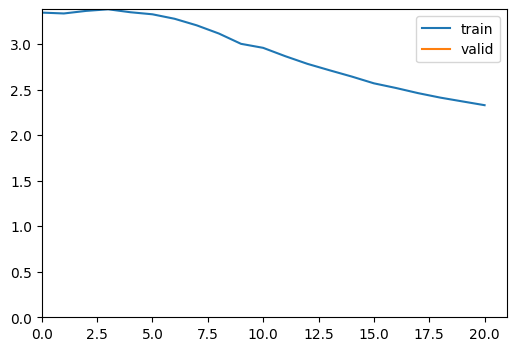

Could not gather input dimensions


epoch,train_loss,valid_loss,COCOMetric,time
0,1.586879,1.449452,0.401320,00:26
1,1.534425,1.418301,0.437688,00:26
2,1.484863,1.383477,0.438423,00:26


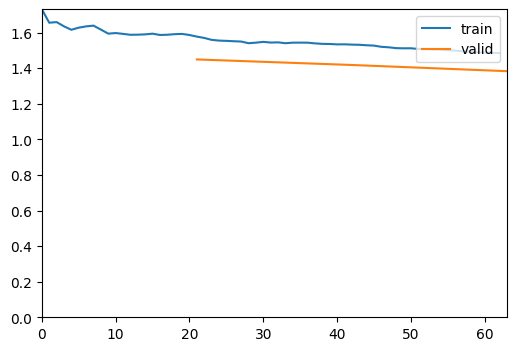

In [4]:
%matplotlib inline

flywheel.train_model(batch_size=32, epoch=3)

INFO     - Identifying most incorrect examples... | data_flywheel.flywheel:get_most_wrong:81
INFO     - Losses returned by model: ['loss_cls', 'loss_bbox'] | icevision.models.interpretation:plot_top_losses:220


  0%|          | 0/164 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

COCOMetric,▁▅██
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_2,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_3,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_4,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_5,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_6,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_0,▁▁▂▃▃▅▆▆██▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_1,▁▁▂▃▃▅▆▆██▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁


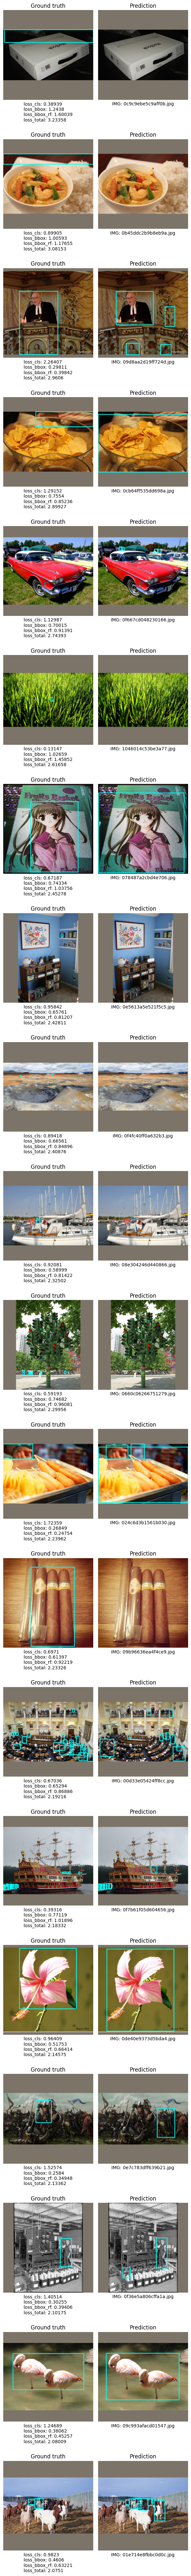

In [5]:
annotations_to_review = flywheel.get_most_wrong(method='top-loss')

In [6]:
annotations_to_review

['0c9c9ebe5c9aff0b.xml',
 '0b45ddc2b9b8eb9a.xml',
 '09d8aa2d19ff724d.xml',
 '0cb64ff535dd698a.xml',
 '0f667cd048230166.xml',
 '1046014c53be3a77.xml',
 '078487a2cbd4e706.xml',
 '0e5613a5e521f5c5.xml',
 '0f4fc40ff0a632b3.xml',
 '08e304246d440866.xml',
 '0660c06266751279.xml',
 '024c6d3b1561b030.xml',
 '09b96636ea4f4ce9.xml',
 '00d33e05424ff8cc.xml',
 '0f7b61f05d604656.xml',
 '0de40e9373d5bda4.xml',
 '0e7c783dff639b21.xml',
 '0f36e5a806cffa1a.xml',
 '09c993afacd01547.xml',
 '01e714e8fbbc0d0c.xml',
 '0f0596b1c511e071.xml',
 '0a73064c82730ff5.xml',
 '0153285f283a6f96.xml',
 '036e266b8e97fd2f.xml',
 '0be1f84400c07dae.xml',
 '035f9a5f8369d8c6.xml',
 '0d2b0563bf1f9c4e.xml',
 '0f00a73b3614d4d2.xml',
 '0f425a184b11200d.xml',
 '00ccda615ec9731d.xml',
 '0c53a955b482161a.xml',
 '0e35f4cfb2cc04f6.xml',
 '0f8d558eb4c3a10a.xml',
 '0e4a2294a1439e17.xml',
 '031336c27b5d1168.xml',
 '079d870c5c5a2b71.xml',
 '0d68f5133355b30a.xml',
 '049b2fae5ca8aa8b.xml',
 '00fd93edd4717826.xml',
 '0a8657e8b5c9d7bb.xml',


In [7]:
flywheel.relabel_data()

INFO     - Launching streamlit to review annotations... | data_flywheel.flywheel:relabel_data:108
INFO     - Review annotations here: http://0.0.0.0:8501 | data_flywheel.flywheel:relabel_data:109


KeyboardInterrupt: 